<a href="https://colab.research.google.com/github/liviaaoliveira/Bot/blob/master/Pipelines_para_Previs%C3%A3o_de_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
df = pd.read_excel("DatabaseStudents.xlsx")
df.head()

,ID Matricula,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
0,12331219,Solteiro,Design de Animação e Multimédia,Ensino Secundário,122.0,Português,127.3,Não,Não,Sim,Masculino,Não,Não,0,0,0,0,0.000000e+00,0,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
1,12133366,Solteiro,Turismo,Ensino Secundário,160.0,Português,142.5,Não,Não,Não,Masculino,Não,Não,0,6,6,6,1.400000e+01,0,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduado
2,11935513,Solteiro,Design de Comunicação,Ensino Secundário,122.0,Português,124.8,Não,Não,Não,Masculino,Não,Não,0,6,0,0,0.000000e+00,0,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
3,11737660,Solteiro,Jornalismo e Comunicação,Ensino Secundário,122.0,Português,119.6,Não,Não,Sim,Feminino,Não,Não,0,6,8,6,1.342857e+16,0,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduado
4,11539807,Casado,Serviço Social (prestação nocturna),Ensino Secundário,100.0,Português,141.5,Não,Não,Sim,Feminino,Não,Não,0,6,9,5,1.233333e+16,0,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduado


In [5]:
df.shape # volumetria dos dados

(4424, 29)

In [6]:
set(df['Target']) # filtro do status atual do aluno

{'Desistente', 'Graduado', 'Matriculado'}

In [7]:
len(df)

4424

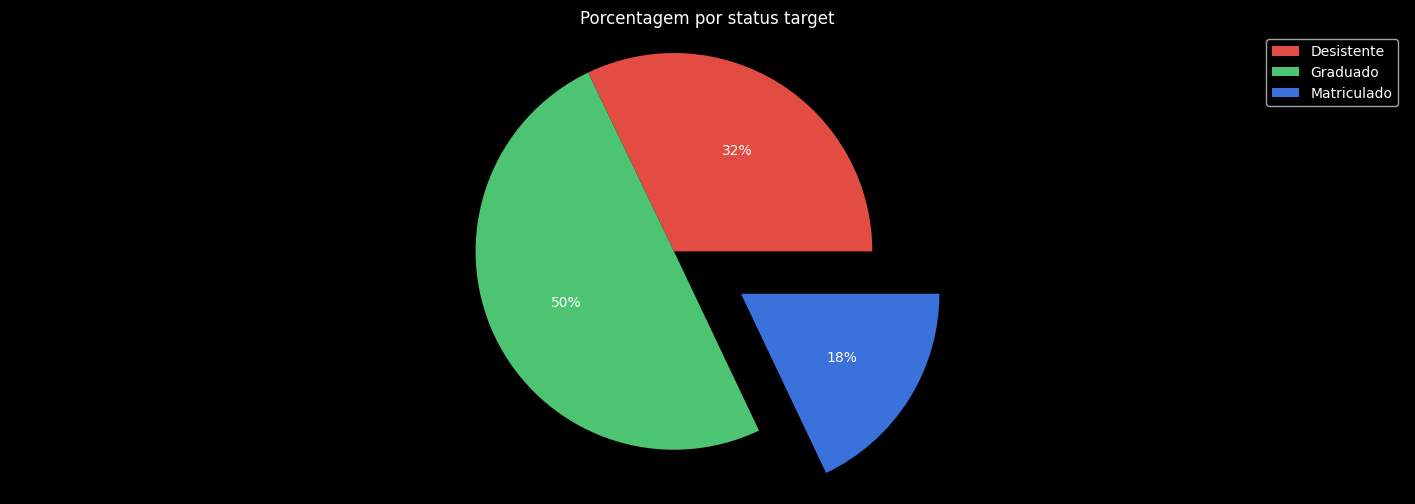

In [10]:
#Calcular o total de alunos(as) por tipo de status
df_targets_percent = df.groupby('Target')['Target'].count()

# Calculando a proporção de estudantes por categoria
total_estudantes = len(df)
df_target_porcentagem = df_targets_percent / total_estudantes * 100

#Separando os valores e nomes em uma lista, para deixar o gráfico mais apresentável
labels = df_target_porcentagem.index.tolist()
sizes = df_target_porcentagem.values.tolist()

#Criando o gráfico
plt.style.use('dark_background')
figura, grafico = plt.subplots(figsize=(18, 6))
grafico.pie(sizes, autopct='%1.0f%%', colors=[ '#e34c42','#4dc471','#3b71db'], labeldistance = 1.1,
           explode=[0, 0, .4])
grafico.axis('equal')
plt.title('Porcentagem por status target')
plt.legend(labels, loc='best')
plt.show()

In [11]:
df_evadidos = df[df['Target'] == 'Desistente']
df_graduados = df[df['Target'] == 'Graduado']

df_concatenado = pd.concat([df_evadidos, df_graduados])

set(df_concatenado['Target'])

{'Desistente', 'Graduado'}

In [12]:
df_concatenado.head()

,ID Matricula,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
0,12331219,Solteiro,Design de Animação e Multimédia,Ensino Secundário,122.0,Português,127.3,Não,Não,Sim,Masculino,Não,Não,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Desistente
2,11935513,Solteiro,Design de Comunicação,Ensino Secundário,122.0,Português,124.8,Não,Não,Não,Masculino,Não,Não,0,6,0,0,0.0,0,0,6,0,0,0.0,0,10.8,1.4,1.74,Desistente
7,10946248,Solteiro,Turismo,Ensino Secundário,119.0,Português,113.1,Não,Não,Não,Masculino,Não,Não,0,5,5,0,0.0,0,0,5,5,0,0.0,0,15.5,2.8,-4.06,Desistente
9,10550542,Solteiro,Serviço Social,Ensino Secundário,138.0,Português,123.0,Não,Sim,Não,Feminino,Não,Não,0,6,9,5,11.4,0,0,6,14,2,13.5,0,8.9,1.4,3.51,Desistente
12,9956983,Solteiro,Ensino Básico,Ensino Secundário,133.0,Português,130.2,Não,Não,Sim,Feminino,Não,Não,0,6,6,0,0.0,0,0,6,0,0,0.0,0,12.7,3.7,-1.70,Desistente


In [13]:
df_concatenado.shape

(3630, 29)

In [14]:
df_concatenado['Target'].value_counts()

,count
Target,
Graduado,2209
Desistente,1421


In [15]:
round(df_concatenado['Target'].value_counts(normalize = True)*100,0)

,proportion
Target,
Graduado,61.0
Desistente,39.0


In [16]:
df_concatenado["ID Matricula"].duplicated().sum()

np.int64(0)

In [17]:
df_concatenado.isnull().sum()

,0
ID Matricula,0
EstadoCivil,0
Curso,0
QualificacaoAnterior,0
QualificacaoAnteriorGrau,0
Nacionalidade,0
NotaAdmissao,5
NecessidadesEspeciais,0
Devedor,0
MensalidadesEmDia,0


In [19]:
df_concatenado['Target'] = df_concatenado['Target'].replace({'Desistente': 0, 'Graduado': 1}) # transformando a target em binária

In [20]:
! pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 6.5 MB/s eta 0:00:00


In [21]:
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from category_encoders.cat_boost import CatBoostEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, roc_curve, auc

In [22]:
X = df_concatenado[['QualificacaoAnteriorGrau', 'NotaAdmissao', 'UnidadesCurriculares1SemestreCreditado', 'UnidadesCurriculares1SemestreInscrito',
                       'UnidadesCurriculares1SemestreAvaliacoes',  'UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreGrau',
                       'TaxaDesemprego', 'TaxaInflacao', 'PIB', 'EstadoCivil', 'Curso', 'QualificacaoAnterior','Devedor']] #caracteristicas

y = df_concatenado["Target"]

In [23]:
colunas_binarias = [
    col for col in X.columns
    if X[col].dropna().isin(["Sim", "Não"]).all()
]

colunas_categoricas = [
    col for col in X.select_dtypes(include="object").columns
    if col not in colunas_binarias
]

colunas_numericas = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin # BaseEstimator para ser compatível com Pipeline - disponibiliza get_params(). O TransformerMixin formece fit_transform()

class BinarizadorSimNao(BaseEstimator, TransformerMixin):
    def __init__(self, colunas):
        self.colunas = colunas

    def fit(self, X, y=None):
        # não aprende nada
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.colunas:
            if col in X.columns:
                X[col] = X[col].map({"Não": 0, "Sim": 1}).astype("Int64")
        return X

binarizador_sim_nao = BinarizadorSimNao(colunas_binarias)

In [26]:
# instancia o binarizador
binarizador_sim_nao = BinarizadorSimNao(colunas_binarias)

# pré-processador
preprocessador = ColumnTransformer(
    transformers=[
        (
            "num",
            Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("scaler", MinMaxScaler())
            ]),
            colunas_numericas
        ),
        (
            "cat",
            Pipeline([
                ("encoder", CatBoostEncoder())
            ]),
            colunas_categoricas
        )
    ]
)

# pipeline final
pipeline = Pipeline([
    ("binarizador_sim_nao", binarizador_sim_nao),
    ("preprocessador", preprocessador)
])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [28]:
pipeline.fit(X_train, y_train) # treinando a pipeline nos dados de treino

Pipeline(steps=[('binarizador_sim_nao', BinarizadorSimNao(colunas=['Devedor'])),
                ('preprocessador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['QualificacaoAnteriorGrau',
                                                   'NotaAdmissao',
                                                   'UnidadesCurriculares1SemestreCreditado',
                                                   'UnidadesCurriculares1SemestreInscrito',
                                                   'UnidadesCurriculares1SemestreAvaliacoes',
                                                   'UnidadesCurriculares1SemestreAprovado',
                                                   'UnidadesCurriculares1SemestreGrau',
                                                   'TaxaDesemprego',
                                                   'TaxaInflacao', 'PIB']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   CatBoostEncoder())]),
                                                  ['EstadoCivil', 'Curso',
                                                   'QualificacaoAnterior'])]))])

In [29]:
X_train_transformado = pipeline.transform(X_train)
X_train_transformado

array([[0.57894737, 0.57894737, 0.        , ..., 0.6289548 , 0.51165559,
        0.58108373],
       [0.42105263, 0.41157895, 0.        , ..., 0.45920776, 0.33299101,
        0.64310983],
       [0.27368421, 0.21157895, 0.        , ..., 0.6289548 , 0.78362684,
        0.64310983],
       ...,
       [0.47368421, 0.47368421, 0.        , ..., 0.6289548 , 0.54830502,
        0.34708095],
       [0.29473684, 0.30631579, 0.        , ..., 0.6289548 , 0.62901155,
        0.64310983],
       [0.40105263, 0.08421053, 0.        , ..., 0.45920776, 0.37050844,
        0.39401472]])

In [30]:
X_test_transformado = pipeline.transform(X_test) # também aplicando em teste

In [31]:
pipeline.named_steps

{'binarizador_sim_nao': BinarizadorSimNao(colunas=['Devedor']),
 'preprocessador': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('scaler', MinMaxScaler())]),
                                  ['QualificacaoAnteriorGrau', 'NotaAdmissao',
                                   'UnidadesCurriculares1SemestreCreditado',
                                   'UnidadesCurriculares1SemestreInscrito',
                                   'UnidadesCurriculares1SemestreAvaliacoes',
                                   'UnidadesCurriculares1SemestreAprovado',
                                   'UnidadesCurriculares1SemestreGrau',
                                   'TaxaDesemprego', 'TaxaInflacao', 'PIB']),
                                 ('cat',
                                  Pipeline(steps=[('encoder',
   

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_knn = cross_val_score(
    KNeighborsClassifier(n_neighbors=5),
    X_train_transformado,
    y_train,
    cv=cv,
    scoring="f1"
)

print("KNN F1 - CV média:", cv_knn.mean())

KNN F1 - CV média: 0.8487712460155178


In [33]:
cv_rf = cross_val_score(
    RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ),
    X_train_transformado,
    y_train,
    cv=cv,
    scoring="f1"
)

print("RF F1 - CV média:", cv_rf.mean())

RF F1 - CV média: 0.8910048124528727


In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformado, y_train)

KNeighborsClassifier()

In [35]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train_transformado, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=300, random_state=42)

In [36]:
from sklearn.metrics import classification_report

print("KNN")
print(classification_report(y_test, knn.predict(X_test_transformado)))

print("Random Forest")
print(classification_report(y_test, rf.predict(X_test_transformado)))

KNN
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       284
           1       0.80      0.91      0.85       442

    accuracy                           0.81       726
   macro avg       0.82      0.78      0.79       726
weighted avg       0.81      0.81      0.80       726

Random Forest
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       284
           1       0.86      0.89      0.87       442

    accuracy                           0.84       726
   macro avg       0.84      0.83      0.83       726
weighted avg       0.84      0.84      0.84       726



In [37]:
def plot_roc_train_test(model, X_train, y_train, X_test, y_test, nome_modelo):

    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob  = model.predict_proba(X_test)[:, 1]

    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test,  tpr_test,  _ = roc_curve(y_test,  y_test_prob)

    auc_train = auc(fpr_train, tpr_train)
    auc_test  = auc(fpr_test,  tpr_test)

    plt.figure(figsize=(7,6))
    plt.plot(fpr_train, tpr_train, label=f"Treino (AUC = {auc_train:.3f})")
    plt.plot(fpr_test,  tpr_test,  label=f"Teste  (AUC = {auc_test:.3f})")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC — {nome_modelo}")
    plt.legend()
    plt.grid(True)
    plt.show()

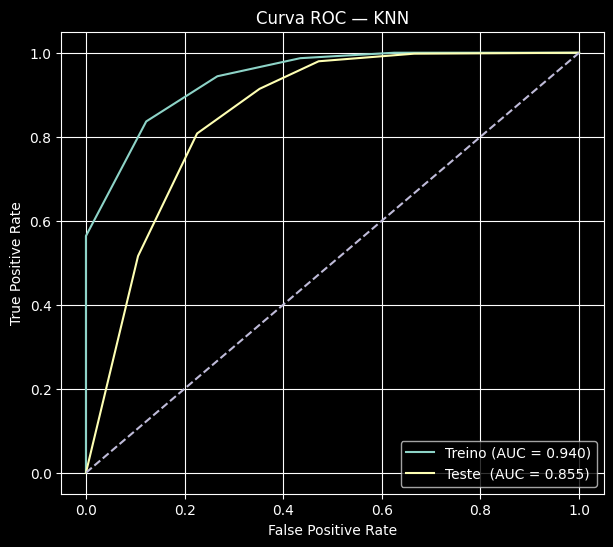

In [38]:
plot_roc_train_test(
    knn,
    X_train_transformado, y_train,
    X_test_transformado, y_test,
    "KNN"
)

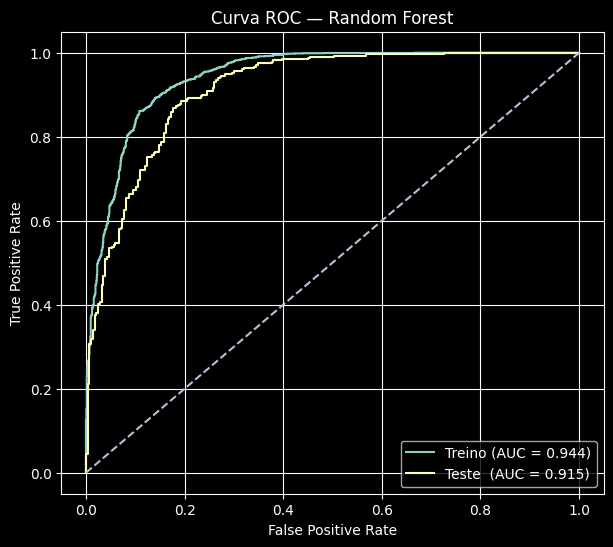

In [39]:
plot_roc_train_test(
    rf,
    X_train_transformado, y_train,
    X_test_transformado, y_test,
    "Random Forest"
)

In [40]:
rf

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=300, random_state=42)

In [41]:
nomes_colunas = pipeline.named_steps["preprocessador"].get_feature_names_out()
nomes_colunas

array(['num__QualificacaoAnteriorGrau', 'num__NotaAdmissao',
       'num__UnidadesCurriculares1SemestreCreditado',
       'num__UnidadesCurriculares1SemestreInscrito',
       'num__UnidadesCurriculares1SemestreAvaliacoes',
       'num__UnidadesCurriculares1SemestreAprovado',
       'num__UnidadesCurriculares1SemestreGrau', 'num__TaxaDesemprego',
       'num__TaxaInflacao', 'num__PIB', 'cat__EstadoCivil', 'cat__Curso',
       'cat__QualificacaoAnterior'], dtype=object)

In [42]:
df_importance = (
    pd.DataFrame({
        "feature": nomes_colunas,
        "importance": rf.feature_importances_
    })
    .sort_values("importance", ascending=False)
)

df_importance["feature"] = (
    df_importance["feature"]
    .str.replace("num__", "", regex=False)
    .str.replace("cat__", "", regex=False)
)

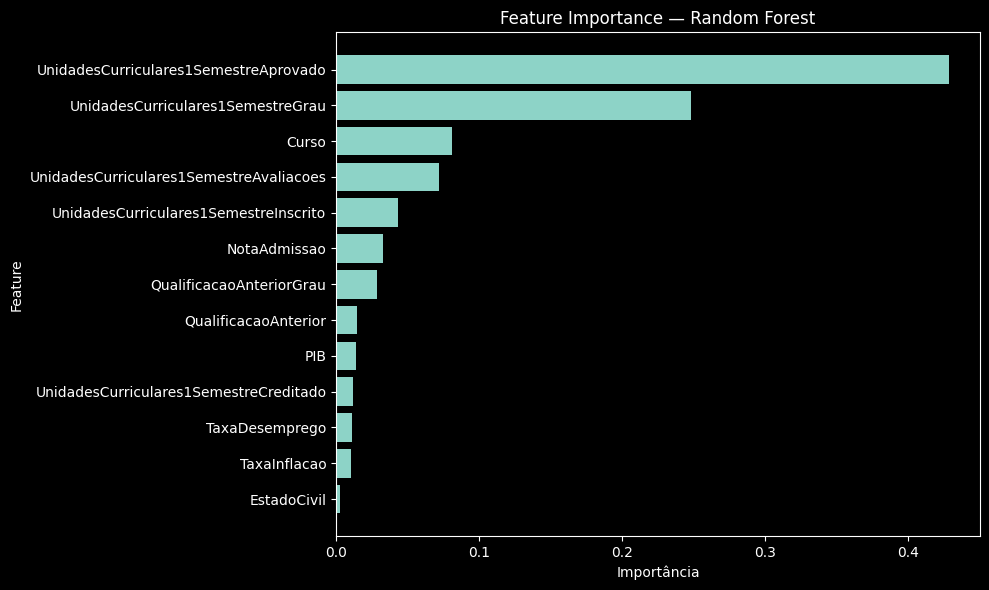

In [43]:
top_n = 20
df_top = df_importance.head(top_n)

plt.figure(figsize=(10, 6))

plt.barh(
    df_top["feature"][::-1],
    df_top["importance"][::-1]
)

plt.title("Feature Importance — Random Forest")
plt.xlabel("Importância")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()

In [44]:
pipeline_final_rf = Pipeline(steps=[
    ("pipeline", pipeline),
    ("model", rf)
])

pipeline_final_rf

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('binarizador_sim_nao',
                                  BinarizadorSimNao(colunas=['Devedor'])),
                                 ('preprocessador',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('scaler',
                                                                                    MinMaxScaler())]),
                                                                   ['QualificacaoAnteriorGrau',
                                                                    'NotaAdmissao',
                                                                    'UnidadesCurriculares1SemestreCreditado',
                                                                    'Unida...
                                                                    'UnidadesCurriculares1SemestreAprovado',
                                                                    'UnidadesCurriculares1SemestreGrau',
                                                                    'TaxaDesemprego',
                                                                    'TaxaInflacao',
                                                                    'PIB']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('encoder',
                                                                                    CatBoostEncoder())]),
                                                                   ['EstadoCivil',
                                                                    'Curso',
                                                                    'QualificacaoAnterior'])]))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_leaf=10,
                                        min_samples_split=20, n_estimators=300,
                                        random_state=42))])

In [46]:
pipeline_final_rf.fit(X_train, y_train)
hasattr(pipeline_final_rf.named_steps["model"], "estimators_")

True

In [47]:
import pickle

with open("pipeline_rf_final.pkl", "wb") as f:
    pickle.dump(pipeline_final_rf, f)

In [48]:
df_matriculados = df[df["Target"] == "Matriculado"].copy()
X_matriculados = df_matriculados[['QualificacaoAnteriorGrau', 'NotaAdmissao', 'UnidadesCurriculares1SemestreCreditado', 'UnidadesCurriculares1SemestreInscrito',
                       'UnidadesCurriculares1SemestreAvaliacoes',  'UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreGrau',
                       'TaxaDesemprego', 'TaxaInflacao', 'PIB', 'EstadoCivil', 'Curso', 'QualificacaoAnterior','Devedor']]
X_matriculados.head()

,QualificacaoAnteriorGrau,NotaAdmissao,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,TaxaDesemprego,TaxaInflacao,PIB,EstadoCivil,Curso,QualificacaoAnterior,Devedor
16,137.0,137.4,0,6,10,1,1.200000e+01,10.8,1.4,1.74,Solteiro,Serviço Social,Ensino Secundário,Não
19,140.0,124.6,0,7,7,6,1.166667e+16,16.2,0.3,-0.92,Solteiro,Ensino Básico,Ensino Secundário,Não
21,127.0,121.8,0,7,14,7,1.143750e+05,12.7,3.7,-1.70,Solteiro,Higiene Oral,Ensino Secundário,Não
25,151.0,157.0,0,6,8,5,1.160000e+01,7.6,2.6,0.32,Solteiro,Serviço Social,Ensino Secundário,Sim
27,138.0,131.0,0,5,9,5,1.266667e+16,9.4,-0.8,-3.12,Solteiro,Enfermagem Veterinária,Ensino Secundário,Não


In [49]:
df_matriculados["predicao_rf"] = pipeline_final_rf.predict(X_matriculados)
df_matriculados["probabilidade_rf"] = pipeline_final_rf.predict_proba(
    X_matriculados
)[:, 1]

In [50]:
df_matriculados.head()

,ID Matricula,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target,predicao_rf,probabilidade_rf
16,9165571,Solteiro,Serviço Social,Ensino Secundário,137.0,Português,137.4,Não,Não,Sim,Feminino,Não,Não,0,6,10,1,1.200000e+01,0,0,6,14,2,11.0,0,10.8,1.4,1.74,Matriculado,0,0.210547
19,8572012,Solteiro,Ensino Básico,Ensino Secundário,140.0,Português,124.6,Não,Não,Sim,Feminino,Não,Não,0,7,7,6,1.166667e+16,0,0,7,8,6,13.5,0,16.2,0.3,-0.92,Matriculado,1,0.746570
21,8176306,Solteiro,Higiene Oral,Ensino Secundário,127.0,Português,121.8,Não,Não,Sim,Feminino,Não,Não,0,7,14,7,1.143750e+05,0,0,8,9,8,11425.0,0,12.7,3.7,-1.70,Matriculado,1,0.775642
25,7384894,Solteiro,Serviço Social,Ensino Secundário,151.0,Português,157.0,Não,Sim,Sim,Feminino,Sim,Não,0,6,8,5,1.160000e+01,0,0,6,12,4,11.0,0,7.6,2.6,0.32,Matriculado,1,0.662977
27,7384896,Solteiro,Enfermagem Veterinária,Ensino Secundário,138.0,Português,131.0,Não,Não,Sim,Feminino,Não,Não,0,5,9,5,1.266667e+16,2,0,5,7,4,13.0,0,9.4,-0.8,-3.12,Matriculado,1,0.857340


In [51]:
df_matriculados["flag_acao"] = df_matriculados["probabilidade_rf"].apply(
    lambda x: "Ação imediata" if x <= 0.25 else
              "Propensão de sucesso" if x >= 0.75 else
              "Acompanhar"
)


In [52]:
df_matriculados

,ID Matricula,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target,predicao_rf,probabilidade_rf,flag_acao
16,9165571,Solteiro,Serviço Social,Ensino Secundário,137.0,Português,137.4,Não,Não,Sim,Feminino,Não,Não,0,6,10,1,1.200000e+01,0,0,6,14,2,1.100000e+01,0,10.8,1.4,1.74,Matriculado,0,0.210547,Ação imediata
19,8572012,Solteiro,Ensino Básico,Ensino Secundário,140.0,Português,124.6,Não,Não,Sim,Feminino,Não,Não,0,7,7,6,1.166667e+16,0,0,7,8,6,1.350000e+01,0,16.2,0.3,-0.92,Matriculado,1,0.746570,Acompanhar
21,8176306,Solteiro,Higiene Oral,Ensino Secundário,127.0,Português,121.8,Não,Não,Sim,Feminino,Não,Não,0,7,14,7,1.143750e+05,0,0,8,9,8,1.142500e+04,0,12.7,3.7,-1.70,Matriculado,1,0.775642,Propensão de sucesso
25,7384894,Solteiro,Serviço Social,Ensino Secundário,151.0,Português,157.0,Não,Sim,Sim,Feminino,Sim,Não,0,6,8,5,1.160000e+01,0,0,6,12,4,1.100000e+01,0,7.6,2.6,0.32,Matriculado,1,0.662977,Acompanhar
27,7384896,Solteiro,Enfermagem Veterinária,Ensino Secundário,138.0,Português,131.0,Não,Não,Sim,Feminino,Não,Não,0,5,9,5,1.266667e+16,2,0,5,7,4,1.300000e+01,0,9.4,-0.8,-3.12,Matriculado,1,0.857340,Propensão de sucesso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,99448192,Solteiro,Ensino Básico,Ensino Secundário,116.0,Português,110.4,Não,Não,Sim,Feminino,Não,Não,0,6,9,5,1.260000e+01,0,0,6,9,3,1.166667e+16,0,9.4,-0.8,-3.12,Matriculado,1,0.551087,Acompanhar
4402,99448197,Solteiro,Ensino Básico,Ensino Secundário,168.0,Português,126.8,Não,Não,Sim,Masculino,Não,Não,0,6,7,5,1.260000e+01,0,0,6,6,6,1.300000e+01,0,10.8,1.4,1.74,Matriculado,1,0.620246,Acompanhar
4406,99448201,Solteiro,Design de Comunicação,Ensino Secundário,145.0,Português,127.5,Não,Não,Sim,Masculino,Não,Não,0,6,6,4,1.200000e+01,0,0,6,8,2,1.133333e+16,0,10.8,1.4,1.74,Matriculado,0,0.431604,Acompanhar
4412,99448207,Solteiro,Design de Comunicação,Ensino Secundário,125.0,Português,133.4,Não,Não,Sim,Masculino,Sim,Não,4,6,6,4,1.300000e+01,0,2,6,7,5,1.220000e+01,0,13.9,-0.3,0.79,Matriculado,0,0.330227,Acompanhar


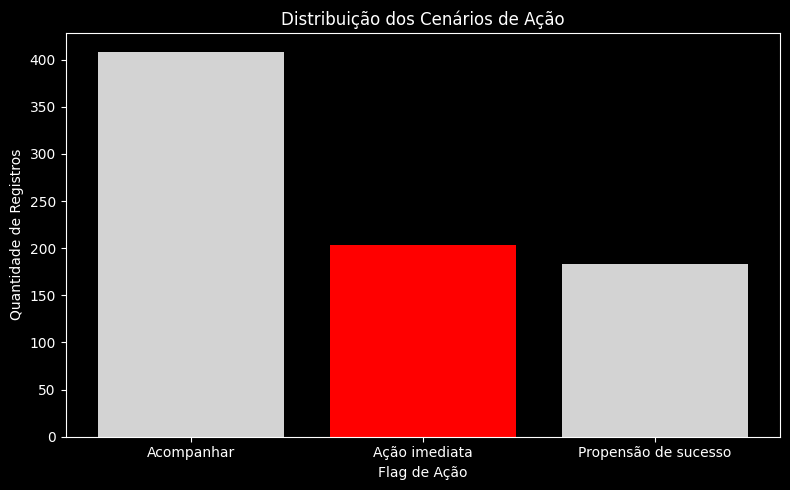

In [53]:
contagem_flag = df_matriculados["flag_acao"].value_counts()

cores = [
    "red" if flag == "Ação imediata" else "lightgray"
    for flag in contagem_flag.index
]

plt.figure(figsize=(8, 5))
plt.bar(contagem_flag.index, contagem_flag.values, color=cores)

plt.title("Distribuição dos Cenários de Ação")
plt.xlabel("Flag de Ação")
plt.ylabel("Quantidade de Registros")

plt.tight_layout()
plt.show()

In [54]:
df_sucesso= df_matriculados[df_matriculados['flag_acao'] == "Propensão de sucesso"]

In [55]:
df_sucesso.describe()

,ID Matricula,QualificacaoAnteriorGrau,NotaAdmissao,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,predicao_rf,probabilidade_rf
count,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.0,183.000000
mean,8.896813e+07,132.692350,127.428962,0.426230,6.650273,8.475410,6.163934,8.244249e+15,0.098361,0.284153,6.715847,9.480874,5.519126,4.458166e+15,0.092896,11.713661,1.251366,0.274754,1.0,0.845254
std,2.801463e+07,11.163335,12.223917,1.635382,1.602912,2.408364,1.183870,6.090034e+15,0.433675,1.220755,1.443485,2.972108,1.609865,6.089156e+15,0.488442,2.484099,1.333007,2.265181,0.0,0.050800
min,7.384896e+06,100.000000,96.000000,0.000000,5.000000,5.000000,5.000000,1.180000e+01,0.000000,0.000000,5.000000,5.000000,1.000000,1.000000e+01,0.000000,7.600000,-0.800000,-4.060000,1.0,0.750207
25%,9.944492e+07,126.500000,120.000000,0.000000,6.000000,7.000000,6.000000,1.585000e+01,0.000000,0.000000,6.000000,8.000000,5.000000,1.235000e+01,0.000000,9.400000,0.500000,-1.700000,1.0,0.804665
50%,9.944626e+07,132.000000,126.100000,0.000000,6.000000,8.000000,6.000000,1.183333e+16,0.000000,0.000000,6.000000,9.000000,6.000000,1.400000e+01,0.000000,11.100000,0.600000,0.790000,1.0,0.843600
75%,9.944721e+07,140.000000,135.450000,0.000000,7.000000,9.000000,6.000000,1.284524e+16,0.000000,0.000000,8.000000,11.000000,6.000000,1.215476e+16,0.000000,13.300000,2.600000,1.790000,1.0,0.888022
max,9.944819e+07,170.000000,170.000000,12.000000,17.000000,19.000000,12.000000,1.542857e+16,3.000000,10.000000,17.000000,22.000000,11.000000,1.466667e+16,4.000000,16.200000,3.700000,3.510000,1.0,0.940730


In [56]:
df_acao_imediata = df_matriculados[df_matriculados['flag_acao'] == "Ação imediata"]

In [57]:
df_acao_imediata.describe()

,ID Matricula,QualificacaoAnteriorGrau,NotaAdmissao,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,predicao_rf,probabilidade_rf
count,2.030000e+02,203.000000,200.000000,203.000000,203.000000,203.000000,203.000000,2.030000e+02,203.000000,203.000000,203.000000,203.000000,203.000000,2.030000e+02,203.000000,203.000000,203.000000,202.000000,203.0,203.000000
mean,9.130623e+07,130.940394,125.152500,0.098522,5.206897,9.862069,1.783251,1.499179e+15,0.369458,0.064039,5.241379,8.906404,2.394089,2.185786e+15,0.384236,11.056650,1.310345,-0.515099,0.0,0.134215
std,2.477812e+07,12.450112,13.105175,0.466871,1.565896,3.885832,1.365166,3.852531e+15,1.249338,0.359919,1.520768,3.521660,1.741277,4.568957e+15,1.234868,2.730755,1.500937,2.370467,0.0,0.071848
min,7.384914e+06,99.000000,99.700000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,7.600000,-0.800000,-4.060000,0.0,0.016913
25%,9.944510e+07,123.000000,117.075000,0.000000,5.000000,8.000000,0.000000,0.000000e+00,0.000000,0.000000,5.000000,7.000000,1.000000,1.000000e+01,0.000000,9.150000,0.300000,-3.120000,0.0,0.057988
50%,9.944612e+07,130.000000,123.000000,0.000000,5.000000,10.000000,2.000000,1.100000e+01,0.000000,0.000000,5.000000,9.000000,3.000000,1.125000e+01,0.000000,10.800000,1.400000,0.320000,0.0,0.144428
75%,9.944713e+07,136.000000,130.900000,0.000000,6.000000,12.000000,3.000000,1.250000e+01,0.000000,0.000000,6.000000,11.000000,4.000000,1.383500e+01,0.000000,12.700000,2.600000,1.740000,0.0,0.194874
max,9.944818e+07,170.000000,170.000000,3.000000,8.000000,18.000000,4.000000,1.433333e+16,8.000000,3.000000,8.000000,19.000000,7.000000,1.433333e+16,8.000000,16.200000,3.700000,3.510000,0.0,0.249844
